In [2]:
import pandas as pd
import bs4
import requests

In [65]:
url_serie = "http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=36482"

In [70]:
page = requests.get(url_serie)

In [71]:
html = page.text
soup = bs4.BeautifulSoup(html)

In [72]:
data = soup.find_all('tr', {'class': 'dxgvDataRow'})

In [ ]:
ipca_dados = []
for row in data:
    try:
        date, valor = row.find_all('td')
        instancia = {'data' : date.text, 'valor': valor.text}
        ipca_dados.append(instancia)
    except:
        print(row)
IPCA = pd.DataFrame(ipca_dados)

In [92]:
IPCA['data'] = pd.to_datetime(IPCA['data'], format='%Y.%m')


In [120]:
IPCA2 = IPCA[IPCA['data'] >= '2005-01-01']

In [121]:
IPCA2['valor'] = pd.to_numeric(IPCA2['valor'].str.replace(".","").str.replace(",","."))

C:\Users\d805664\AppData\Local\Temp/ipykernel_13088/2927832948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPCA2['valor'] = pd.to_numeric(IPCA2['valor'].str.replace(".","").str.replace(",","."))


In [122]:
IPCA2.head()

,data,valor
300,2005-01-01,2412.83
301,2005-02-01,2427.07
302,2005-03-01,2441.87
303,2005-04-01,2463.11
304,2005-05-01,2475.18


In [123]:
IPCA2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 300 to 502
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    203 non-null    datetime64[ns]
 1   valor   203 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


In [125]:
IPCA2.set_index('data', inplace=True)

<AxesSubplot:xlabel='data'>

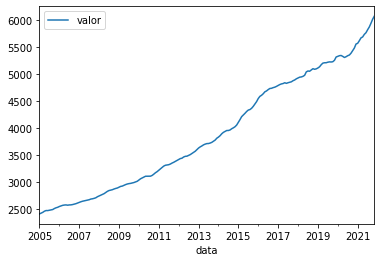

In [110]:
IPCA2.plot.line()

In [126]:
ultimo_indice = IPCA2['valor'][-1]
IPCA2['fator'] = ultimo_indice/IPCA2['valor']

C:\Users\d805664\AppData\Local\Temp/ipykernel_13088/4185411347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPCA2['fator'] = ultimo_indice/IPCA2['valor']


In [127]:
IPCA2.reset_index(inplace=True)

In [128]:
IPCA2.to_html('tabela_ipca.html')

In [129]:
url_teto = "https://previdenciarista.com/blog/tabela-historica-de-tetos-previdenciarios-da-previdencia-social-inss-a-partir-de-1994/"

In [148]:
html_teto = requests.get(url_teto).text

In [149]:
soup_teto = bs4.BeautifulSoup(html_teto)

In [191]:
dados_lista = []
for col in soup_teto.find_all('div', {'class': 'table_col'}):
    dados = col.find_all('div', {'class', 'table_line'})    
    for i in dados:
        dados_lista.append(i.text)

terco = int(len(dados_lista)/3)
dtInicio = dados_lista[0:terco]
teto = dados_lista[terco:terco*2]

In [192]:
dict_teto = {'data': dtInicio, 'teto': teto}
TETO = pd.DataFrame(dict_teto)

In [193]:
TETO.tail()

,data,teto
25,janeiro de 2017,R$ 5.531.31
26,janeiro de 2018,R$ 5.645.80
27,janeiro de 2019,R$ 5.839.45
28,janeiro de 2020,R$ 6.101.06
29,janeiro de 2021,R$ 6.433.57


In [217]:
TETO[['MES','ANO']] = TETO['data'].str.split(" de ", expand=True)

In [222]:
def mesToInt(mes):
    meses = ['janeiro', 'fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
    return meses.index(mes) + 1

mesToInt('março')

3

In [240]:
TETO['MES_INT'] = TETO['MES'].apply(mesToInt)

In [256]:
TETO['ANO'] = TETO['ANO'].apply(lambda x : int(x))

In [262]:
TETO['DIA'] = 1 

In [267]:
TETO['DATA'] = pd.to_datetime(dict(year = TETO['ANO'], month = TETO['MES_INT'], day = TETO['DIA']))

In [268]:
TETO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     30 non-null     object        
 1   teto     30 non-null     object        
 2   MES      30 non-null     object        
 3   ANO      30 non-null     int64         
 4   MES_INT  30 non-null     int64         
 5   DIA      30 non-null     int64         
 6   DATA     30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.8+ KB


In [269]:
TETO2 = TETO[['DATA','teto']]

In [278]:
TETO2['teto'] = TETO2['teto'].apply(lambda x: x.replace("R$ ","").replace(".",""))

C:\Users\d805664\AppData\Local\Temp/ipykernel_13088/2598141420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TETO2['teto'] = TETO2['teto'].apply(lambda x: x.replace("R$ ","").replace(".",""))


In [281]:
TETO2['teto'] = pd.to_numeric(TETO2['teto'])/100

C:\Users\d805664\AppData\Local\Temp/ipykernel_13088/857094640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TETO2['teto'] = pd.to_numeric(TETO2['teto'])/100


In [285]:
TETO2.rename(columns={'DATA':'data'}, inplace=True)

C:\Users\d805664\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [314]:
DF_IPCA_TETO = IPCA2.merge(TETO2, how='left', on='data')

In [315]:
DF_IPCA_TETO['teto'] = DF_IPCA_TETO['teto'].ffill()

In [316]:
TETO2[(TETO2['data'] < '2005-05-01') & (TETO2['data'] > '2004-01-01')]['teto']

12    2508.72
Name: teto, dtype: float64

In [320]:
DF_IPCA_TETO['teto'] = DF_IPCA_TETO['teto'].fillna(2508.72)

In [321]:
DF_IPCA_TETO

,data,valor,fator,teto
0,2005-01-01,2412.83,2.518076,2508.72
1,2005-02-01,2427.07,2.503302,2508.72
2,2005-03-01,2441.87,2.488130,2508.72
3,2005-04-01,2463.11,2.466674,2508.72
4,2005-05-01,2475.18,2.454646,2668.15
...,...,...,...,...
198,2021-07-01,5825.37,1.042971,6433.57
199,2021-08-01,5876.05,1.033975,6433.57
200,2021-09-01,5944.21,1.022119,6433.57
201,2021-10-01,6018.51,1.009501,6433.57


In [326]:
DF_IPCA_TETO.rename(columns={'valor':'IPCA-Indice','data' :'DATA', 'fator': 'FATOR_CORRECAO', 'teto' : 'TETO_INSS'}, inplace=True)

In [328]:
DF_IPCA_TETO['ALIQUOTA'] = 0

In [335]:
DF_IPCA_TETO['ALIQUOTA'].where(DF_IPCA_TETO['DATA'] > '2018-03-01', 0.11, inplace=True)
DF_IPCA_TETO['ALIQUOTA'].where(DF_IPCA_TETO['DATA'] <= '2018-03-01', 0.14, inplace=True)

In [ ]:
DF_IPCA_TETO.set_index('DATA', inplace=True)

In [358]:
DF_IPCA_TETO['CONTRIBUICAO'].where(DF_IPCA_TETO.index > '2012-07-01', 0.0, inplace = True)
DF_IPCA_TETO['CONTRIBUICAO'].where(DF_IPCA_TETO.index <= '2012-07-01', 2000.0, inplace = True)
DF_IPCA_TETO['CONTRIBUICAO'].where(DF_IPCA_TETO.index <= '2014-08-01', 4000.0, inplace = True)

In [360]:
DF_IPCA_TETO['BASE_DEVOLUCAO'] = DF_IPCA_TETO['CONTRIBUICAO']/DF_IPCA_TETO['ALIQUOTA']

In [342]:
tx_devolucao = .075

In [361]:
DF_IPCA_TETO['PREMIO_HISTORICO'] = tx_devolucao*DF_IPCA_TETO['BASE_DEVOLUCAO']

In [365]:
DF_IPCA_TETO['PREMIO_ATUALIZADO'] =  DF_IPCA_TETO['PREMIO_HISTORICO']*DF_IPCA_TETO['FATOR_CORRECAO']

In [367]:
DF_IPCA_TETO['PREMIO_ATUALIZADO_ACUMULADO'] =  DF_IPCA_TETO['PREMIO_ATUALIZADO'].cumsum()

In [ ]:
DF_IPCA_TETO.to_html('tabela_ipca_teto.html')